In [1]:
%matplotlib inline

In [2]:
from pandas import *
import numpy as np
import numpy
import matplotlib
import matplotlib.pyplot as plt
from random import shuffle

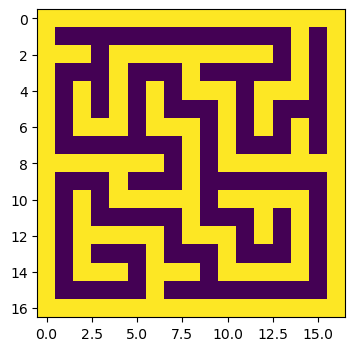

In [3]:
def make_maze(w, h):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]

    def walk(x, y):
        vis[y][x] = 1

        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)

    walk(numpy.random.randint(w), numpy.random.randint(h))

    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])

    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M

maze=numpy.array(make_maze(8,8))

plt.figure(figsize=(4, 4))
plt.imshow(maze)   # or "gray"
plt.show()


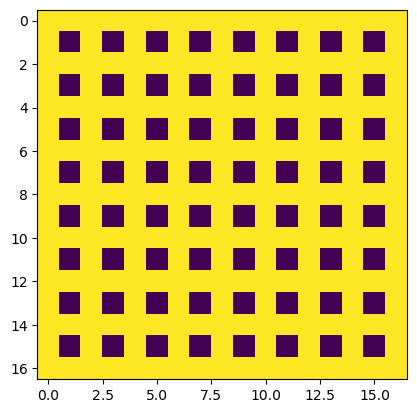

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [15]:
# Illustration
m=numpy.ones((17,17))
for i in range(8):
    for j in range(8):
        m[1+(i*2)][1+(j*2)]=0
plt.imshow(m)
plt.show()
print(m)

In [5]:
#maze
startLocation=[1,1]
targetLocation=[15,15]


In [6]:
maze[1][1]

0

In [7]:
maze[15][15]

0

In [8]:
def getNeighbors(x,y):
    nb=list()
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    for i in range(4):
        nb.append([x+xm[i],y+ym[i]])
    return nb

getNeighbors(1,1)

[[1, 2], [2, 1], [1, 0], [0, 1]]

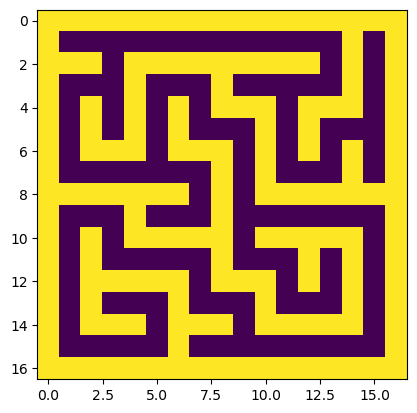

In [9]:
maze[15][13]=0
#plt.imshow(maze)

maze[15][14]=0

plt.imshow(maze)
plt.show()

In DFS - Stack (LIFO)

---


In BFS - Queue (FIFO)

---


In A* - Priority Queue

[1, 1] [15, 15]
success!
[[1, 1], [1, 2], [1, 3], [2, 3], [3, 3], [3, 2], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [6, 5], [5, 5], [4, 5], [3, 5], [3, 6], [3, 7], [4, 7], [5, 7], [5, 8], [5, 9], [6, 9], [7, 9], [8, 9], [9, 9], [10, 9], [11, 9], [11, 10], [11, 11], [12, 11], [13, 11], [13, 12], [13, 13], [12, 13], [11, 13], [9, 10], [9, 11], [9, 12], [9, 13], [9, 14], [9, 15], [10, 15], [11, 15], [12, 15], [13, 15], [14, 15], [15, 15]]


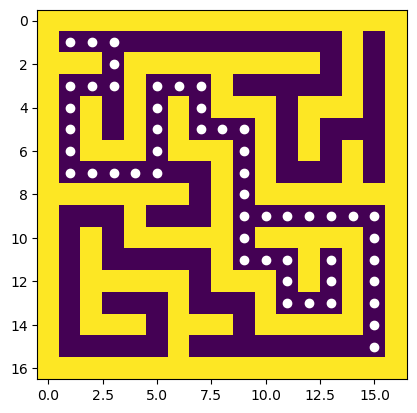

In [10]:
# In DFS - Stack (LIFO), In BFS - Queue (FIFO), In A* - Priority Queue

def DFS(maze,startNode,endNode):
    frontier=list()
    frontier.append(startNode)
    explored=list()
    while len(frontier)!=0:
        currentNode=frontier.pop()
        if currentNode in explored:
            continue
        if currentNode == endNode:
            return "success!",explored+[targetLocation]
        for nb in getNeighbors(currentNode[0],currentNode[1]):
            if maze[nb[0]][nb[1]]==0:
                frontier.append(nb)
        explored.append(currentNode)
    return "failure",explored


plt.imshow(maze)
#plt.show()
print(startLocation,targetLocation)
answer,explored=DFS(maze,startLocation,targetLocation)
print(answer)
print(explored)
#transpose function is used to extract the x and y coordinates of the explored nodes for plotting
plt.plot(np.transpose(explored)[1], np.transpose(explored)[0], 'ow')
plt.show()

In [11]:
len(explored)

51

[1, 1] [15, 15]
success!
[[1, 1], [1, 2], [1, 3], [1, 4], [2, 3], [1, 5], [3, 3], [1, 6], [4, 3], [3, 2], [1, 7], [5, 3], [3, 1], [1, 8], [4, 1], [1, 9], [5, 1], [1, 10], [6, 1], [1, 11], [7, 1], [1, 12], [7, 2], [1, 13], [7, 3], [2, 13], [7, 4], [3, 13], [7, 5], [3, 12], [7, 6], [6, 5], [3, 11], [7, 7], [5, 5], [4, 11], [3, 10], [8, 7], [4, 5], [5, 11], [3, 9], [9, 7], [3, 5], [6, 11], [9, 6], [3, 6], [7, 11], [9, 5], [3, 7], [7, 12], [4, 7], [7, 13], [5, 7], [6, 13], [5, 8], [5, 13], [5, 9], [5, 14], [6, 9], [5, 15], [7, 9], [6, 15], [4, 15], [8, 9], [7, 15], [3, 15], [9, 9], [2, 15], [9, 10], [10, 9], [1, 15], [9, 11], [11, 9], [9, 12], [11, 10], [9, 13], [11, 11], [9, 14], [12, 11], [9, 15], [13, 11], [10, 15], [13, 12], [11, 15], [13, 13], [12, 15], [12, 13], [13, 15], [11, 13], [14, 15], [15, 15]]


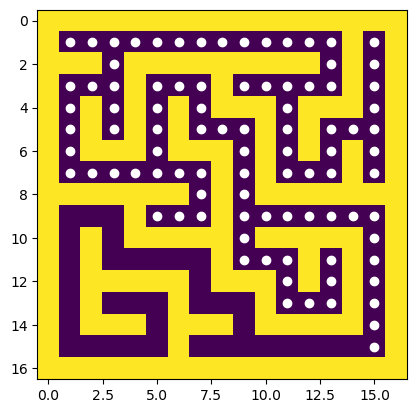

In [12]:
# BFS
from typing import Deque

def BFS(maze,startNode,endNode):
    frontier=Deque()
    frontier.append(startNode)
    explored=list()
    while len(frontier)!=0:
        currentNode=frontier.popleft()
        if currentNode in explored:
            continue
        if currentNode == endNode:
            return "success!",explored+[targetLocation]
        for nb in getNeighbors(currentNode[0],currentNode[1]):
            if maze[nb[0]][nb[1]]==0:
                frontier.append(nb)
        explored.append(currentNode)
    return "failure",explored

plt.imshow(maze)
print(startLocation,targetLocation)
answer,explored=BFS(maze,startLocation,targetLocation)
print(answer)
print(explored)
plt.plot(np.transpose(explored)[1],np.transpose(explored)[0],'ow')
plt.show()

In [13]:
len(explored)

91